In [1]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [2]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb


## A

In [4]:
#rdir = '/workspace'
rdir = '../'

dat_files = natsort(glob2.glob(rdir + '/results/A/**/*.dat'))


len(dat_files)
#dat_files

11

In [5]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [6]:
columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']


In [7]:
dat_files

['..//results/A/1/results_modelA_1.dat',
 '..//results/A/2/results_modelA_2.dat',
 '..//results/A/3/results_modelA_3.dat',
 '..//results/A/4/results_modelA_4.dat',
 '..//results/A/5/results_modelA_5.dat',
 '..//results/A/6/results_modelA_6.dat',
 '..//results/A/7/results_modelA_7.dat',
 '..//results/A/8/results_modelA_8.dat',
 '..//results/A/9/results_modelA_9.dat',
 '..//results/A/10/results_modelA_10.dat',
 '..//results/A/11/results_modelA_11.dat']

In [8]:
#df = pd.read_csv(dat_files[0], sep="\s*", header=None,  index_col=False)
#df.columns = columns3 
#df

In [9]:
data = []
realtime = []
gooddata = []
area = []
col = 'rmsSurfScaled'

for i in dat_files[:-1]:
    print(i)
    
    try:
        df = pd.read_csv(i, sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        realtime.append(df['realtimeScaled'])
        area.append(df['areaintRock'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

..//results/A/1/results_modelA_1.dat
..//results/A/2/results_modelA_2.dat
..//results/A/3/results_modelA_3.dat
..//results/A/4/results_modelA_4.dat
..//results/A/5/results_modelA_5.dat
..//results/A/6/results_modelA_6.dat
..//results/A/7/results_modelA_7.dat
..//results/A/8/results_modelA_8.dat
..//results/A/9/results_modelA_9.dat
..//results/A/10/results_modelA_10.dat


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [10]:
#data

In [14]:



columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

#df = pd.read_csv(dat_files[4], sep="\s*", header=None,  index_col=False)
df5 = pd.read_csv('../results/A/5/results_modelA_5.dat', sep="\s*", header=None,  index_col=False)
df6 = pd.read_csv('../results/A/6/results_modelA_6.dat', sep="\s*", header=None,  index_col=False)
df7 = pd.read_csv('../results/A/7/results_modelA_7.dat', sep="\s*", header=None,  index_col=False)
df8= pd.read_csv('../results/A/8/results_modelA_8.dat', sep="\s*", header=None,  index_col=False)



df5.columns = columns3
df6.columns = columns3
df7.columns = columns3
df8.columns = columns3

#df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)

df5['realtimeScaled'] = (df5['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
df6['realtimeScaled'] = (df6['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
df7['realtimeScaled'] = (df7['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
df8['realtimeScaled'] = (df8['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: ParserWarning: Falling 

(0, 5)

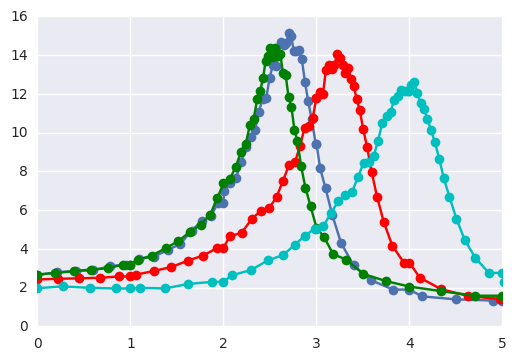

In [17]:
fig, ax = plt.subplots()

ax.plot(df5['realtimeScaled'] , (df5['rmsSurf']/df5['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' )
ax.plot(df6['realtimeScaled'] , (df6['rmsSurf']/df6['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' , c='r')
ax.plot(df7['realtimeScaled'] , (df7['rmsSurf']/df7['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' , c='g')
ax.plot(df8['realtimeScaled'] , (df8['rmsSurf']/df8['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' , c='c')


ax.set_xlim(0, 5)

In [13]:
df5.columns

Index([u'areaintRock', u'tempintRock', u'rmsintRock', u'dwintRock',
       u'vdintRock', u'areaintLith', u'tempintLith', u'rmsintLith',
       u'dwintLith', u'vdintLith', u'areaintLower', u'tempintLower',
       u'rmsintLower', u'dwintLower', u'vdintLower', u'areaintHinge180',
       u'vdintHinge180', u'areaintHinge60', u'vdintHinge60',
       u'areaintInterface', u'vdintInterface', u'vdintInterface0', u'minVel',
       u'maxVel', u'minVxsurf', u'maxVxsurf', u'surfLength', u'rmsSurf',
       u'nuTop', u'nuBottom', u'plateness', u'subzone', u'lRidge', u'rRidge',
       u'realtime', u'realtimeScaled'],
      dtype='object')